In [70]:
import Demo
import Graphics.Color.Space
import Graphics.Color.Space.RGB.SRGB as Standard -- Standardized by IEC 61966-2-1:1999
import qualified Graphics.Color.Space.RGB.Derived.SRGB as Derived

print (Standard.npmStandard :: NPM Standard.SRGB Float)

[ [ 0.412400, 0.357600, 0.180500 ]
, [ 0.212600, 0.715200, 0.072200 ]
, [ 0.019300, 0.119200, 0.950500 ] ]

In [72]:
print (npm :: NPM (Derived.SRGB D65) Double)
-- npmApply (npm :: NPM (Derived.SRGB D65) Float) (ColorRGB 0 0.5 1)

[ [ 0.412390799266, 0.357584339384, 0.180480788402 ]
, [ 0.212639005872, 0.715168678768, 0.072192315361 ]
, [ 0.019330818716, 0.119194779795, 0.950532152250 ] ]

In [73]:
import Graphics.Color.Illuminant.CIE1931

:set -XDataKinds
print (whitePoint :: WhitePoint 'D65 Float)
print (whitePoint :: WhitePoint D65 Float)

WhitePoint (Chromaticity <CIExyY CIE1931 'D65:( 0.312720, 0.329030)>)

WhitePoint (Chromaticity <CIExyY * D65:( 0.312700, 0.329000)>)

In [74]:
g = gamut :: Gamut Standard.SRGB D65 Float
gamutRedPrimary g
gamutGreenPrimary g
gamutBluePrimary g

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.640000, 0.330000)>)

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.300000, 0.600000)>)

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.150000, 0.060000)>)

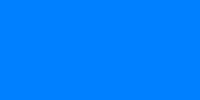

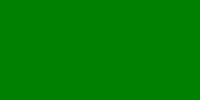

In [75]:
showColorSRGB (ColorRGB 0 0.5 1)
showColorSRGB (ColorRGB 0 0.5 0)

In [82]:
ct = ColorRGB 0 0.5 1 :: Color Standard.SRGB Float
cb = ColorRGB 0 0.5 0 :: Color Standard.SRGB Float

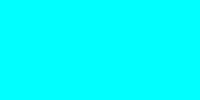

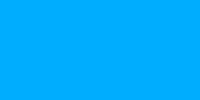

In [83]:
showColorSRGB (ct + cb)
showColorSRGB (ecctf (dcctf ct + dcctf cb))

In [84]:
import Graphics.Color.Space.RGB.AdobeRGB
ct
toColorXYZ ct
fromColorXYZ (toColorXYZ ct) :: Color AdobeRGB Float

<SRGB:( 0.000000, 0.500000, 1.000000)>

<XYZ * D65:( 0.257041111836, 0.225282223673, 0.976013703945)>

<AdobeRGB:( 0.280389, 0.496114, 0.985140)>

In [85]:
cb
convertColor cb :: Color AdobeRGB Float

<SRGB:( 0.000000, 0.500000, 0.000000)>

<AdobeRGB:( 0.280290, 0.496114, 0.116300)>

In [86]:
g = gamut :: Gamut AdobeRGB D65 Float
gamutRedPrimary g
gamutGreenPrimary g
gamutBluePrimary g

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.640000, 0.330000)>)

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.210000, 0.710000)>)

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.150000, 0.060000)>)

In [87]:
g = gamut :: Gamut Standard.SRGB D65 Float
gamutRedPrimary g
gamutGreenPrimary g
gamutBluePrimary g

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.640000, 0.330000)>)

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.300000, 0.600000)>)

PrimaryChromaticity (Chromaticity <CIExyY * D65:( 0.150000, 0.060000)>)

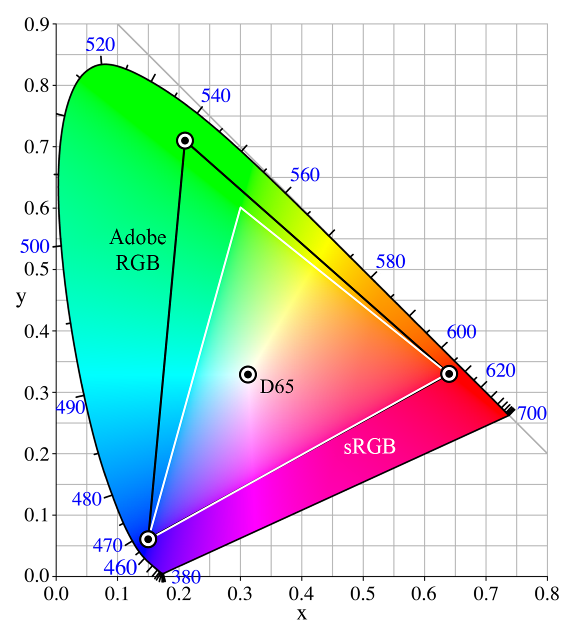

In [88]:
import Data.Massiv.Array as A
import Data.Massiv.Array.IO as A
rgbs <- readImageAuto "CIExy1931_AdobeRGB_vs_sRGB.png" :: IO (A.Image S SRGB Word8)
display rgbs

In [89]:
import Graphics.Color.Space.RGB.Alternative

ct
fromBaseSpace ct :: Color (HSI SRGB) Float
fromBaseSpace ct :: Color (HSL SRGB) Float
fromBaseSpace ct :: Color (HSV SRGB) Float
fromBaseSpace ct :: Color (YCbCr SRGB) Float
fromBaseSpace ct :: Color (CMYK SRGB) Float

<SRGB:( 0.000000, 0.500000, 1.000000)>

<HSI-SRGB:( 0.583333, 1.000000, 0.500000)>

<HSL-SRGB:( 0.583333, 1.000000, 0.500000)>

<HSV-SRGB:( 0.583333, 1.000000, 1.000000)>

<YCbCr-SRGB:( 0.407500, 0.834368, 0.209344)>

<CMYK-SRGB:( 1.000000, 0.500000, 0.000000, 0.000000)>

In [90]:
ycbcr = fromBaseSpace ct :: Color (YCbCr SRGB) Float
toColorXYZ ycbcr
toColorXYZ ct

<XYZ * D65:( 0.257041081892, 0.225282149663, 0.976013691238)>

<XYZ * D65:( 0.257041111836, 0.225282223673, 0.976013703945)>

In [91]:
import Graphics.Color.Space.RGB.Luma

rgbLuma ct
luminance ct

<Y':( 0.407500000000)>

<Y * D65:( 0.225282223673)>

In [ ]:
ycbcr

In [92]:
import Graphics.Color.Space.CIE1976.LAB
green = ColorLAB 50.209 (-53.031) 41.386 :: Color (LAB D65) Float
toWord8 <$> (convertColor green :: Color SRGB Float)

<SRGB:(  0,139, 42)>